Engenharia de Recursos (Feature Engeneering):

> A ideia da engenharia de recursos é que você consiga mexer no seu dataset de uma determinada maneira que ele se ajuste a seu problema;

> Existem várias técnicas para melhorar a qualidade de nossos dados. Ex.:
  - Quando fazemos a deleção de dados que não são necessários;
  - A criação de um novo campo/novas features;
  - etc.
  

Criando Novas Variáveis

>



In [143]:
import pandas as pd


In [144]:
df = pd.read_csv('Bovespa.csv')
df

,Date,Ticker,Open,High,Low,Close,Volume,Adj Close
0,27/9/2016,VALE3,"17,35","17,63","17,1","17,6",3173900,"17,6"
1,26/9/2016,VALE3,"17,39","17,68","17,38","17,44",2331200,"17,44"
2,23/9/2016,VALE3,"17,47","17,84","17,31","17,65",4769800,"17,65"
3,22/9/2016,VALE3,"17,86","17,96","17,32","17,55",5386000,"17,55"
4,21/9/2016,VALE3,"17,21","17,65","17,1","17,65",7617300,"17,65"
...,...,...,...,...,...,...,...,...
14972,5/10/2015,ELPL4,"10,68","10,82","10,44","10,64",588200,"10,3369"
14973,2/10/2015,ELPL4,"10,51","10,81","10,26","10,52",915800,"10,2203"
14974,1/10/2015,ELPL4,"10,94","11,2","10,52","10,57",1858100,"10,2689"
14975,30/9/2015,ELPL4,"10,78","11,05","10,66","10,95",401000,"10,6381"


In [145]:
df_vale = df[df['Ticker'] == 'VALE3']
df_vale

,Date,Ticker,Open,High,Low,Close,Volume,Adj Close
0,27/9/2016,VALE3,"17,35","17,63","17,1","17,6",3173900,"17,6"
1,26/9/2016,VALE3,"17,39","17,68","17,38","17,44",2331200,"17,44"
2,23/9/2016,VALE3,"17,47","17,84","17,31","17,65",4769800,"17,65"
3,22/9/2016,VALE3,"17,86","17,96","17,32","17,55",5386000,"17,55"
4,21/9/2016,VALE3,"17,21","17,65","17,1","17,65",7617300,"17,65"
...,...,...,...,...,...,...,...,...
257,2/10/2015,VALE3,"17,08","17,93","16,87","17,82",7116900,"17,46904"
258,1/10/2015,VALE3,"16,81","17,51","16,71","17,22",6028900,"16,88085"
259,30/9/2015,VALE3,"16,96","17,05","16,33","16,58",6672100,"16,25346"
260,29/9/2015,VALE3,"16,8","17,18","16,43","16,48",7694600,"16,15543"


In [146]:
df_vale.dtypes

Date         object
Ticker       object
Open         object
High         object
Low          object
Close        object
Volume        int64
Adj Close    object
dtype: object

In [147]:
df_vale['Date'] = pd.to_datetime(df_vale['Date'], format = '%d/%m/%Y')

<ipython-input-147-c07a0c4beef9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vale['Date'] = pd.to_datetime(df_vale['Date'], format = '%d/%m/%Y')


In [148]:
df_vale.dtypes

Date         datetime64[ns]
Ticker               object
Open                 object
High                 object
Low                  object
Close                object
Volume                int64
Adj Close            object
dtype: object

Seria interessante também ter uma média móvel do valor do preço das ações ao longo do tempo:

> Altero o tipo de 'Close' para poder fazer uma média dos valores a cada 5 dias e 21 dias;

> .rolling() (Cálculos de estátisticas móveis)
.mean()

In [149]:
df_vale['Close'] = df_vale['Close'].str.replace(',', '.', regex=True)

<ipython-input-149-4609f6ae2536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vale['Close'] = df_vale['Close'].str.replace(',', '.', regex=True)


In [150]:
df_vale

,Date,Ticker,Open,High,Low,Close,Volume,Adj Close
0,2016-09-27,VALE3,"17,35","17,63","17,1",17.6,3173900,"17,6"
1,2016-09-26,VALE3,"17,39","17,68","17,38",17.44,2331200,"17,44"
2,2016-09-23,VALE3,"17,47","17,84","17,31",17.65,4769800,"17,65"
3,2016-09-22,VALE3,"17,86","17,96","17,32",17.55,5386000,"17,55"
4,2016-09-21,VALE3,"17,21","17,65","17,1",17.65,7617300,"17,65"
...,...,...,...,...,...,...,...,...
257,2015-10-02,VALE3,"17,08","17,93","16,87",17.82,7116900,"17,46904"
258,2015-10-01,VALE3,"16,81","17,51","16,71",17.22,6028900,"16,88085"
259,2015-09-30,VALE3,"16,96","17,05","16,33",16.58,6672100,"16,25346"
260,2015-09-29,VALE3,"16,8","17,18","16,43",16.48,7694600,"16,15543"


Devemos converter a coluna de 'object' para 'numeric' mas há valores nulos nela, não permitindo fazer as médias normalmente. Então é necessário "tratar" os valores 'NaN'para isso:

In [151]:
df_vale['Close'] = pd.to_numeric(df_vale['Close'])

<ipython-input-151-3927f287df74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vale['Close'] = pd.to_numeric(df_vale['Close'])


In [152]:
df_vale

,Date,Ticker,Open,High,Low,Close,Volume,Adj Close
0,2016-09-27,VALE3,"17,35","17,63","17,1",17.60,3173900,"17,6"
1,2016-09-26,VALE3,"17,39","17,68","17,38",17.44,2331200,"17,44"
2,2016-09-23,VALE3,"17,47","17,84","17,31",17.65,4769800,"17,65"
3,2016-09-22,VALE3,"17,86","17,96","17,32",17.55,5386000,"17,55"
4,2016-09-21,VALE3,"17,21","17,65","17,1",17.65,7617300,"17,65"
...,...,...,...,...,...,...,...,...
257,2015-10-02,VALE3,"17,08","17,93","16,87",17.82,7116900,"17,46904"
258,2015-10-01,VALE3,"16,81","17,51","16,71",17.22,6028900,"16,88085"
259,2015-09-30,VALE3,"16,96","17,05","16,33",16.58,6672100,"16,25346"
260,2015-09-29,VALE3,"16,8","17,18","16,43",16.48,7694600,"16,15543"


In [153]:
df_vale['mm5d'] = df_vale['Close'].rolling(5).mean()
df_vale['mm21d'] = df_vale['Close'].rolling(21).mean()

<ipython-input-153-3d9dc8522808>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vale['mm5d'] = df_vale['Close'].rolling(5).mean()
<ipython-input-153-3d9dc8522808>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vale['mm21d'] = df_vale['Close'].rolling(21).mean()


In [154]:
df_vale

,Date,Ticker,Open,High,Low,Close,Volume,Adj Close,mm5d,mm21d
0,2016-09-27,VALE3,"17,35","17,63","17,1",17.60,3173900,"17,6",NaN,NaN
1,2016-09-26,VALE3,"17,39","17,68","17,38",17.44,2331200,"17,44",NaN,NaN
2,2016-09-23,VALE3,"17,47","17,84","17,31",17.65,4769800,"17,65",NaN,NaN
3,2016-09-22,VALE3,"17,86","17,96","17,32",17.55,5386000,"17,55",NaN,NaN
4,2016-09-21,VALE3,"17,21","17,65","17,1",17.65,7617300,"17,65",17.578,NaN
...,...,...,...,...,...,...,...,...,...,...
257,2015-10-02,VALE3,"17,08","17,93","16,87",17.82,7116900,"17,46904",18.896,18.380952
258,2015-10-01,VALE3,"16,81","17,51","16,71",17.22,6028900,"16,88085",18.328,18.388571
259,2015-09-30,VALE3,"16,96","17,05","16,33",16.58,6672100,"16,25346",17.614,18.409524
260,2015-09-29,VALE3,"16,8","17,18","16,43",16.48,7694600,"16,15543",17.248,18.405238


Posso criar um novo DataFrame para um projeto de Machine Learning, por exemplo, somente com os campos necessários:

In [157]:
df_features = df_vale.drop(['Date', 'Ticker', 'Close'], axis=1)

In [158]:
df_features

,Open,High,Low,Volume,Adj Close,mm5d,mm21d
0,"17,35","17,63","17,1",3173900,"17,6",NaN,NaN
1,"17,39","17,68","17,38",2331200,"17,44",NaN,NaN
2,"17,47","17,84","17,31",4769800,"17,65",NaN,NaN
3,"17,86","17,96","17,32",5386000,"17,55",NaN,NaN
4,"17,21","17,65","17,1",7617300,"17,65",17.578,NaN
...,...,...,...,...,...,...,...
257,"17,08","17,93","16,87",7116900,"17,46904",18.896,18.380952
258,"16,81","17,51","16,71",6028900,"16,88085",18.328,18.388571
259,"16,96","17,05","16,33",6672100,"16,25346",17.614,18.409524
260,"16,8","17,18","16,43",7694600,"16,15543",17.248,18.405238


Transformar dados categóricos em Dados Numéricos:

Encoding
> get_dummies

Para projetos de Machine Learning, por exemplo, dados categóricos não funcionam, então é necessário fazer o encoding.

Dados do Titanic:

In [198]:
df = pd.read_csv('http://bit.ly/kaggletrain')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [199]:
sex = pd.get_dummies(df.Sex)

In [200]:
emb = pd.get_dummies(df.Embarked)

In [201]:
df = pd.concat([df, emb], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [202]:
df2 = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [203]:
df2

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1,0,0,1


Checando Outliers:

> Outliers: São aqueles dados que estão fora da média de um conjunto de dados;

Algumas técnicas para saber se temos outliers dentro do nosso dataset:
- Cálculo do Z score;
-


In [218]:
df = pd.read_csv('weight-hight.csv')
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


(array([2., 2., 2., 1., 2., 1., 1., 2., 1., 1.]),
 array([52.21 , 54.435, 56.66 , 58.885, 61.11 , 63.335, 65.56 , 67.785,
        70.01 , 72.235, 74.46 ]),
 <BarContainer object of 10 artists>)

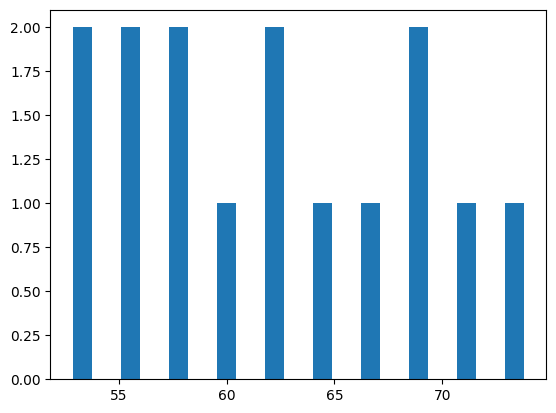

In [221]:
from matplotlib import pyplot as plt

plt.hist(df.Weight, bins=10, rwidth=0.4)

In [222]:
df['zscore'] = (df.Weight - df.Weight.mean()) / df.Weight.std()

In [223]:
df

,Height,Weight,zscore
0,1.47,52.21,-1.402200
1,1.50,53.12,-1.272892
2,1.52,54.48,-1.079642
3,1.55,55.84,-0.886392
4,1.57,57.20,-0.693142
5,1.60,58.57,-0.498471
6,1.63,59.93,-0.305221
7,1.65,61.29,-0.111971
8,1.68,63.11,0.146643
9,1.70,64.47,0.339893


In [225]:
df_out2 = df[ (df.zscore < -2) | (df.zscore > 2)]
df_out2

,Height,Weight,zscore


Não há nenhuma linha com zscore maior que 2 ou menor que -2.